In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
from shapely import wkt
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix

import math
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

import warnings
warnings.simplefilter('ignore')
elec_type_colors = ['green', 'gold']
cmap = 'RdYlBu_r'

print('All the tools needed have been loaded')

All the tools needed have been loaded


In [4]:
df = pd.read_csv('/content/usa.csv')
df.head(2)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,NaN,04-01-2005,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,17:42,Urban,Raining no high winds,2005.0,No
1,200501BS00002,B,450.0,C,0.0,Slight,NaN,05-01-2005,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,NaN,30.0,17:36,Urban,Fine no high winds,2005.0,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187366 entries, 0 to 187365
Data columns (total 34 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               187366 non-null  object 
 1   1st_Road_Class                               187366 non-null  object 
 2   1st_Road_Number                              187364 non-null  float64
 3   2nd_Road_Class                               109411 non-null  object 
 4   2nd_Road_Number                              185266 non-null  float64
 5   Accident_Severity                            187366 non-null  object 
 6   Carriageway_Hazards                          3716 non-null    object 
 7   Date                                         187366 non-null  object 
 8   Day_of_Week                                  187366 non-null  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  187149 non-nul

In [8]:
print(f'There has been a total of {df.shape[0]} accidents reported in the period covered by this dataset')

There has been a total of 187366 accidents reported in the period covered by this dataset


In [13]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

<Axes: >

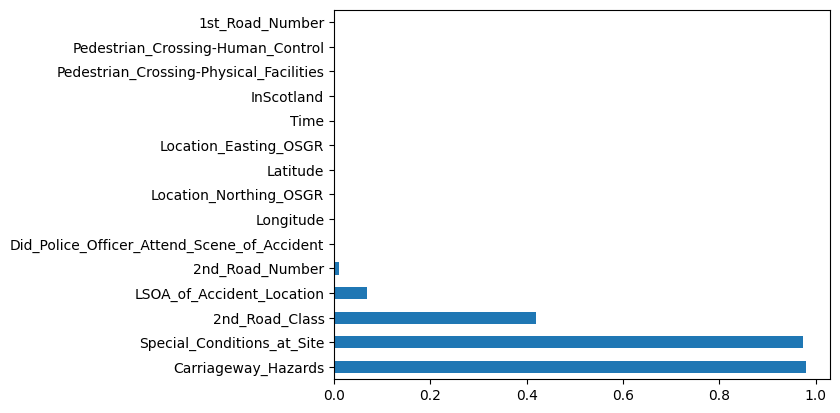

In [15]:
missing_percentage = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentage
missing_percentage[missing_percentage != 0].plot(kind='barh')

In [16]:
df.columns

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object')